# HW4 - Lorenzo Mazzocco

In [1]:
import openmc
import openmc.lib
import numpy as np
import matplotlib.pyplot as plt
import os
from uncertainties import ufloat
from uncertainties.umath import *
nps = 50000

os.environ['OPENMC_CROSS_SECTIONS'] = "/home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/cross_sections.xml"

# Q1

## REFERENCE 

In [2]:
fuel_enrichment = 3.0
pitch = 1.25 # cm
z_max = 1.0

fuel_OR = 0.39218 # cm
clad_OR = 0.45720 # cm

fuel_density = 10.31341 # g/cm3
clad_density = 6.55 # g/cm3

fuel_temperature = 900 #K
clad_temperature = 600 #K
mod_temperature = 600 #K


############### DEFINE MATERIALS

fuel = openmc.Material(name='fuel')
fuel.add_element('U', 1, enrichment=fuel_enrichment)
fuel.add_element('O', 2)
fuel.set_density('g/cc', fuel_density)
fuel.temperature = fuel_temperature

clad = openmc.Material(name='clad')
clad.add_element('Zr', 100.0, 'wo')
clad.set_density('g/cm3', clad_density)
clad.temperature = clad_temperature

mod = openmc.model.borated_water(boron_ppm=0, temperature=mod_temperature, pressure=15, temp_unit='K', 
                                 press_unit='MPa')


materials = openmc.Materials([fuel, clad, mod])
materials.export_to_xml()



############### DEFINE GEOMETRY

cyl_fo = openmc.ZCylinder(r=fuel_OR)
cyl_co = openmc.ZCylinder(r=clad_OR)
box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

fuel_cell = openmc.Cell(name='fuel', fill=fuel)
fuel_cell.region = -cyl_fo & +z0 & -z1
clad_cell = openmc.Cell(name='clad', fill=clad)
clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
mod_cell = openmc.Cell(name='moderator', fill=mod)
mod_cell.region = +cyl_co & box & +z0 & -z1

pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
geometry = openmc.Geometry(pin_univ)
geometry.export_to_xml()


############### DEFINE SETTINGS
settings = openmc.Settings()
settings.inactive = 50
settings.batches = 200
settings.particles = nps 
settings.temperature={'method': 'interpolation','range':(300,1200)}

lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
upper_right = np.array([pitch/2, pitch/2, z_max/2])

box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
src = openmc.Source(space=box)
settings.source = src

settings.export_to_xml()


############### RUN
openmc.lib.init()
openmc.lib.run()
k_ref = openmc.lib.keff()
k_ref = ufloat(k_ref[0],k_ref[1])
openmc.lib.finalize()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 294 K
 Maximum neutron data temperature: 1200 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O18
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <========

      181/1    1.31021    1.31192 +/- 0.00063
      182/1    1.31272    1.31193 +/- 0.00063
      183/1    1.30809    1.31190 +/- 0.00062
      184/1    1.30727    1.31186 +/- 0.00062
      185/1    1.30875    1.31184 +/- 0.00062
      186/1    1.30985    1.31183 +/- 0.00061
      187/1    1.30074    1.31175 +/- 0.00061
      188/1    1.31592    1.31178 +/- 0.00061
      189/1    1.31495    1.31180 +/- 0.00060
      190/1    1.32383    1.31189 +/- 0.00061
      191/1    1.31417    1.31190 +/- 0.00060
      192/1    1.31081    1.31189 +/- 0.00060
      193/1    1.31567    1.31192 +/- 0.00059
      194/1    1.32359    1.31200 +/- 0.00060
      195/1    1.30706    1.31197 +/- 0.00059
      196/1    1.32838    1.31208 +/- 0.00060
      197/1    1.31069    1.31207 +/- 0.00059
      198/1    1.32264    1.31214 +/- 0.00059
      199/1    1.30887    1.31212 +/- 0.00059
      200/1    1.32051    1.31218 +/- 0.00059
 Creating state point statepoint.200.h5...

 =======================>     TIMING

## PERTURBATION A  -  (Iron Clad) 

In [3]:
fuel_enrichment = 3.0
pitch = 1.25 # cm
z_max = 1.0

fuel_OR = 0.39218 # cm
clad_OR = 0.45720 # cm

fuel_density = 10.31341 # g/cm3
clad_density = 7.87 # g/cm3

fuel_temperature = 900 #K
clad_temperature = 600 #K
mod_temperature = 600 #K


############### DEFINE MATERIALS

fuel = openmc.Material(name='fuel')
fuel.add_element('U', 1, enrichment=fuel_enrichment)
fuel.add_element('O', 2)
fuel.set_density('g/cc', fuel_density)
fuel.temperature = fuel_temperature

clad = openmc.Material(name='clad')
clad.add_element('Fe', 100.0, 'wo')
clad.set_density('g/cm3', clad_density)
clad.temperature = clad_temperature

mod = openmc.model.borated_water(boron_ppm=0, temperature=mod_temperature, pressure=15, temp_unit='K', 
                                 press_unit='MPa')


materials = openmc.Materials([fuel, clad, mod])
materials.export_to_xml()



############### DEFINE GEOMETRY

cyl_fo = openmc.ZCylinder(r=fuel_OR)
cyl_co = openmc.ZCylinder(r=clad_OR)
box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

fuel_cell = openmc.Cell(name='fuel', fill=fuel)
fuel_cell.region = -cyl_fo & +z0 & -z1
clad_cell = openmc.Cell(name='clad', fill=clad)
clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
mod_cell = openmc.Cell(name='moderator', fill=mod)
mod_cell.region = +cyl_co & box & +z0 & -z1

pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
geometry = openmc.Geometry(pin_univ)
geometry.export_to_xml()


############### DEFINE SETTINGS
settings = openmc.Settings()
settings.inactive = 50
settings.batches = 200
settings.particles = nps
settings.temperature={'method': 'interpolation','range':(300,1200)}

lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
upper_right = np.array([pitch/2, pitch/2, z_max/2])

box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
src = openmc.Source(space=box)
settings.source = src

settings.export_to_xml()


############### RUN
openmc.lib.init()
openmc.lib.run()
k_a = openmc.lib.keff()
k_a = ufloat(k_a[0],k_a[1])
openmc.lib.finalize()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

      127/1    1.15357    1.15699 +/- 0.00078
      128/1    1.15122    1.15691 +/- 0.00078
      129/1    1.15753    1.15692 +/- 0.00077
      130/1    1.16441    1.15701 +/- 0.00076
      131/1    1.14866    1.15691 +/- 0.00076
      132/1    1.15404    1.15688 +/- 0.00075
      133/1    1.15736    1.15688 +/- 0.00074
      134/1    1.15917    1.15691 +/- 0.00073
      135/1    1.14907    1.15682 +/- 0.00073
      136/1    1.16125    1.15687 +/- 0.00072
      137/1    1.16750    1.15699 +/- 0.00073
      138/1    1.15259    1.15694 +/- 0.00072
      139/1    1.15335    1.15690 +/- 0.00071
      140/1    1.16089    1.15694 +/- 0.00071
      141/1    1.15670    1.15694 +/- 0.00070
      142/1    1.15191    1.15689 +/- 0.00069
      143/1    1.15970    1.15692 +/- 0.00069
      144/1    1.15516    1.15690 +/- 0.00068
      145/1    1.16367    1.15697 +/- 0.00068
      146/1    1.15277    1.15693 +/- 0.00067
      147/1    1.15620    1.15692 +/- 0.00066
      148/1    1.16086    1.15696 

In [4]:
# COMPUTE REACTIVITY CHANGE

rea_a = (1/k_ref - 1/k_a)*1e5
print("Perturbation A yields a reactivity change of {:.0f} +/- {:.0f} pcm.".format(rea_a.nominal_value, rea_a.std_dev))

Perturbation A yields a reactivity change of -10168 +/- 31 pcm.


## PERTURBATION B  -  (no water S_alpha_beta)

In [5]:
fuel_enrichment = 3.0
pitch = 1.25 # cm
z_max = 1.0

fuel_OR = 0.39218 # cm
clad_OR = 0.45720 # cm

fuel_density = 10.31341 # g/cm3
clad_density = 6.55 # g/cm3

fuel_temperature = 900 #K
clad_temperature = 600 #K
mod_temperature = 600 #K


############### DEFINE MATERIALS

fuel = openmc.Material(name='fuel')
fuel.add_element('U', 1, enrichment=fuel_enrichment)
fuel.add_element('O', 2)
fuel.set_density('g/cc', fuel_density)
fuel.temperature = fuel_temperature

clad = openmc.Material(name='clad')
clad.add_element('Zr', 100.0, 'wo')
clad.set_density('g/cm3', clad_density)
clad.temperature = clad_temperature

mod = openmc.Material(name='mod')
mod.add_element('H', 2.0, 'ao')
mod.add_element('O', 1.0, 'ao')
mod.set_density('g/cm3', 0.659) # new density obtained by NIST thermophysical properties
mod.temperature = mod_temperature


materials = openmc.Materials([fuel, clad, mod])
materials.export_to_xml()



############### DEFINE GEOMETRY

cyl_fo = openmc.ZCylinder(r=fuel_OR)
cyl_co = openmc.ZCylinder(r=clad_OR)
box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

fuel_cell = openmc.Cell(name='fuel', fill=fuel)
fuel_cell.region = -cyl_fo & +z0 & -z1
clad_cell = openmc.Cell(name='clad', fill=clad)
clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
mod_cell = openmc.Cell(name='moderator', fill=mod)
mod_cell.region = +cyl_co & box & +z0 & -z1

pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
geometry = openmc.Geometry(pin_univ)
geometry.export_to_xml()


############### DEFINE SETTINGS
settings = openmc.Settings()
settings.inactive = 50
settings.batches = 200
settings.particles = 10*nps
settings.temperature={'method': 'interpolation','range':(300,1200)}

lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
upper_right = np.array([pitch/2, pitch/2, z_max/2])

box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
src = openmc.Source(space=box)
settings.source = src

settings.export_to_xml()


############### RUN
openmc.lib.init()
openmc.lib.run()
k_b = openmc.lib.keff()
k_b = ufloat(k_b[0],k_b[1])
openmc.lib.finalize()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O18
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.31329
        2/1    1.31277
        3/1

      185/1    1.30759    1.31285 +/- 0.00022
      186/1    1.31368    1.31285 +/- 0.00021
      187/1    1.31351    1.31286 +/- 0.00021
      188/1    1.30834    1.31283 +/- 0.00021
      189/1    1.31432    1.31284 +/- 0.00021
      190/1    1.31248    1.31283 +/- 0.00021
      191/1    1.31198    1.31283 +/- 0.00021
      192/1    1.31305    1.31283 +/- 0.00021
      193/1    1.31415    1.31284 +/- 0.00021
      194/1    1.31228    1.31283 +/- 0.00021
      195/1    1.31468    1.31285 +/- 0.00020
      196/1    1.31003    1.31283 +/- 0.00020
      197/1    1.31000    1.31281 +/- 0.00020
      198/1    1.31453    1.31282 +/- 0.00020
      199/1    1.31374    1.31283 +/- 0.00020
      200/1    1.30856    1.31280 +/- 0.00020
 Creating state point statepoint.200.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 1.5062e+00 seconds
   Reading cross sections          = 1.4954e+00 seconds
 Total time in simulation     

In [6]:
# COMPUTE REACTIVITY CHANGE

rea_b = (1/k_ref - 1/k_b)*1e5
print("Perturbation B yields a reactivity change of {:.0f} +/- {:.0f} pcm.".format(rea_b.nominal_value, rea_b.std_dev))

Perturbation B yields a reactivity change of 89 +/- 21 pcm.


## PERTURBATION C  -  ( fuel temperature)

To compute reactivity coefficients I use a central difference numerical approximation which should converge to second order.

In [7]:
def perturb_fuel_T(h):
    fuel_enrichment = 3.0
    pitch = 1.25 # cm
    z_max = 1.0

    fuel_OR = 0.39218 # cm
    clad_OR = 0.45720 # cm

    fuel_density = 10.31341 # g/cm3
    clad_density = 6.55 # g/cm3

    fuel_temperature = 900 + h #K
    clad_temperature = 600 #K
    mod_temperature = 600 #K


    ############### DEFINE MATERIALS

    fuel = openmc.Material(name='fuel')
    fuel.add_element('U', 1, enrichment=fuel_enrichment)
    fuel.add_element('O', 2)
    fuel.set_density('g/cc', fuel_density)
    fuel.temperature = fuel_temperature

    clad = openmc.Material(name='clad')
    clad.add_element('Zr', 100.0, 'wo')
    clad.set_density('g/cm3', clad_density)
    clad.temperature = clad_temperature

    mod = openmc.model.borated_water(boron_ppm=0, temperature=mod_temperature, pressure=15, temp_unit='K', 
                                     press_unit='MPa')


    materials = openmc.Materials([fuel, clad, mod])
    materials.export_to_xml()



    ############### DEFINE GEOMETRY

    cyl_fo = openmc.ZCylinder(r=fuel_OR)
    cyl_co = openmc.ZCylinder(r=clad_OR)
    box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
    z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
    z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

    fuel_cell = openmc.Cell(name='fuel', fill=fuel)
    fuel_cell.region = -cyl_fo & +z0 & -z1
    clad_cell = openmc.Cell(name='clad', fill=clad)
    clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
    mod_cell = openmc.Cell(name='moderator', fill=mod)
    mod_cell.region = +cyl_co & box & +z0 & -z1

    pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
    geometry = openmc.Geometry(pin_univ)
    geometry.export_to_xml()


    ############### DEFINE SETTINGS
    settings = openmc.Settings()
    settings.inactive = 50
    settings.batches = 200
    settings.particles = nps
    settings.temperature={'method': 'interpolation','range':(300,1200)}

    lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
    upper_right = np.array([pitch/2, pitch/2, z_max/2])

    box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
    src = openmc.Source(space=box)
    settings.source = src

    settings.export_to_xml()


    ############### RUN
    openmc.lib.init()
    openmc.lib.run()
    k_c = openmc.lib.keff()
    k_c = ufloat(k_c[0],k_c[1])
    openmc.lib.finalize()
    
    return k_c


In [8]:
def central_difference(h, function):
    k_forw = function(h)
    k_back = function(-h)
    
    coeff = (1/k_back - 1/k_forw)*1e5/2/h
    return coeff

In [9]:
# COMPUTE REACTIVITY COEFFICIENT

hh = [100, 50, 20, 10]

cc_fuel = [central_difference(h, perturb_fuel_T) for h in hh]

print(cc_fuel)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.30963    1.30884 +/- 0.00065
      180/1    1.31015    1.30885 +/- 0.00064
      181/1    1.30913    1.30886 +/- 0.00064
      182/1    1.31087    1.30887 +/- 0.00063
      183/1    1.31030    1.30888 +/- 0.00063
      184/1    1.31199    1.30890 +/- 0.00063
      185/1    1.31822    1.30897 +/- 0.00062
      186/1    1.31723    1.30903 +/- 0.00062
      187/1    1.30887    1.30903 +/- 0.00062
      188/1    1.30626    1.30901 +/- 0.00061
      189/1    1.30638    1.30899 +/- 0.00061
      190/1    1.29464    1.30889 +/- 0.00061
      191/1    1.31993    1.30897 +/- 0.00062
      192/1    1.31412    1.30901 +/- 0.00061
      193/1    1.32247    1.30910 +/- 0.00061
      194/1    1.32006    1.30918 +/- 0.00062
      195/1    1.31590    1.30922 +/- 0.00061
      196/1    1.31908    1.30929 +/- 0.00061
      197/1    1.30589    1.30927 +/- 0.00061
      198/1    1.29119    1.30914 +/- 0.00062
      199/1    1.31573    1.30919 +/- 0.00061
      200/1    1.29960    1.30912 

 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O18
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULAT

      181/1    1.31471    1.31461 +/- 0.00068
      182/1    1.31327    1.31460 +/- 0.00068
      183/1    1.31949    1.31464 +/- 0.00068
      184/1    1.31899    1.31467 +/- 0.00067
      185/1    1.32695    1.31476 +/- 0.00067
      186/1    1.32314    1.31482 +/- 0.00067
      187/1    1.32225    1.31488 +/- 0.00067
      188/1    1.31519    1.31488 +/- 0.00066
      189/1    1.31385    1.31487 +/- 0.00066
      190/1    1.31512    1.31488 +/- 0.00065
      191/1    1.31787    1.31490 +/- 0.00065
      192/1    1.33068    1.31501 +/- 0.00065
      193/1    1.33032    1.31511 +/- 0.00066
      194/1    1.32450    1.31518 +/- 0.00066
      195/1    1.31480    1.31518 +/- 0.00065
      196/1    1.31385    1.31517 +/- 0.00065
      197/1    1.31070    1.31514 +/- 0.00064
      198/1    1.32099    1.31518 +/- 0.00064
      199/1    1.31595    1.31518 +/- 0.00064
      200/1    1.33097    1.31529 +/- 0.00064
 Creating state point statepoint.200.h5...

 =======================>     TIMING

 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O18
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULAT

      181/1    1.30273    1.30922 +/- 0.00061
      182/1    1.30226    1.30917 +/- 0.00061
      183/1    1.30471    1.30913 +/- 0.00060
      184/1    1.31269    1.30916 +/- 0.00060
      185/1    1.30726    1.30915 +/- 0.00059
      186/1    1.31299    1.30918 +/- 0.00059
      187/1    1.30576    1.30915 +/- 0.00059
      188/1    1.32454    1.30926 +/- 0.00059
      189/1    1.31168    1.30928 +/- 0.00059
      190/1    1.30515    1.30925 +/- 0.00059
      191/1    1.32988    1.30940 +/- 0.00060
      192/1    1.30591    1.30937 +/- 0.00060
      193/1    1.31477    1.30941 +/- 0.00059
      194/1    1.31840    1.30947 +/- 0.00059
      195/1    1.30397    1.30943 +/- 0.00059
      196/1    1.30717    1.30942 +/- 0.00059
      197/1    1.31556    1.30946 +/- 0.00058
      198/1    1.31337    1.30949 +/- 0.00058
      199/1    1.32624    1.30960 +/- 0.00059
      200/1    1.30084    1.30954 +/- 0.00059
 Creating state point statepoint.200.h5...

 =======================>     TIMING

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.29995    1.31306 +/- 0.00065
      180/1    1.32359    1.31314 +/- 0.00065
      181/1    1.30713    1.31310 +/- 0.00065
      182/1    1.30580    1.31304 +/- 0.00065
      183/1    1.30846    1.31301 +/- 0.00064
      184/1    1.30978    1.31299 +/- 0.00064
      185/1    1.30765    1.31295 +/- 0.00063
      186/1    1.32825    1.31306 +/- 0.00064
      187/1    1.31388    1.31306 +/- 0.00063
      188/1    1.31808    1.31310 +/- 0.00063
      189/1    1.30384    1.31303 +/- 0.00063
      190/1    1.31697    1.31306 +/- 0.00063
      191/1    1.30916    1.31303 +/- 0.00062
      192/1    1.30310    1.31296 +/- 0.00062
      193/1    1.29140    1.31281 +/- 0.00064
      194/1    1.31968    1.31286 +/- 0.00063
      195/1    1.30978    1.31284 +/- 0.00063
      196/1    1.30318    1.31277 +/- 0.00063
      197/1    1.31139    1.31276 +/- 0.00062
      198/1    1.32085    1.31282 +/- 0.00062
      199/1    1.30944    1.31280 +/- 0.00062
      200/1    1.30937    1.31277 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.30910    1.31083 +/- 0.00064
      180/1    1.30790    1.31081 +/- 0.00064
      181/1    1.30793    1.31078 +/- 0.00063
      182/1    1.30052    1.31071 +/- 0.00063
      183/1    1.32405    1.31081 +/- 0.00063
      184/1    1.30712    1.31078 +/- 0.00063
      185/1    1.29928    1.31069 +/- 0.00063
      186/1    1.31553    1.31073 +/- 0.00063
      187/1    1.31953    1.31079 +/- 0.00063
      188/1    1.31056    1.31079 +/- 0.00062
      189/1    1.30006    1.31072 +/- 0.00062
      190/1    1.31548    1.31075 +/- 0.00062
      191/1    1.30427    1.31070 +/- 0.00062
      192/1    1.31482    1.31073 +/- 0.00061
      193/1    1.31801    1.31078 +/- 0.00061
      194/1    1.31479    1.31081 +/- 0.00061
      195/1    1.30253    1.31075 +/- 0.00060
      196/1    1.30286    1.31070 +/- 0.00060
      197/1    1.32808    1.31082 +/- 0.00061
      198/1    1.30039    1.31075 +/- 0.00061
      199/1    1.31352    1.31077 +/- 0.00061
      200/1    1.30612    1.31074 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31570    1.31238 +/- 0.00062
      180/1    1.30690    1.31234 +/- 0.00062
      181/1    1.30827    1.31231 +/- 0.00061
      182/1    1.30848    1.31228 +/- 0.00061
      183/1    1.32283    1.31236 +/- 0.00061
      184/1    1.31796    1.31240 +/- 0.00061
      185/1    1.30706    1.31236 +/- 0.00060
      186/1    1.31538    1.31238 +/- 0.00060
      187/1    1.31042    1.31237 +/- 0.00059
      188/1    1.31243    1.31237 +/- 0.00059
      189/1    1.31194    1.31237 +/- 0.00059
      190/1    1.30630    1.31232 +/- 0.00058
      191/1    1.30493    1.31227 +/- 0.00058
      192/1    1.31026    1.31226 +/- 0.00058
      193/1    1.32405    1.31234 +/- 0.00058
      194/1    1.30871    1.31231 +/- 0.00058
      195/1    1.30836    1.31229 +/- 0.00057
      196/1    1.30582    1.31224 +/- 0.00057
      197/1    1.31313    1.31225 +/- 0.00057
      198/1    1.32438    1.31233 +/- 0.00057
      199/1    1.31120    1.31232 +/- 0.00056
      200/1    1.32112    1.31238 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31738    1.31088 +/- 0.00056
      180/1    1.30882    1.31086 +/- 0.00056
      181/1    1.31507    1.31090 +/- 0.00056
      182/1    1.30516    1.31085 +/- 0.00055
      183/1    1.31666    1.31090 +/- 0.00055
      184/1    1.31325    1.31091 +/- 0.00055
      185/1    1.31399    1.31094 +/- 0.00054
      186/1    1.30469    1.31089 +/- 0.00054
      187/1    1.31679    1.31093 +/- 0.00054
      188/1    1.30444    1.31089 +/- 0.00054
      189/1    1.30923    1.31088 +/- 0.00053
      190/1    1.32090    1.31095 +/- 0.00053
      191/1    1.30464    1.31090 +/- 0.00053
      192/1    1.30883    1.31089 +/- 0.00053
      193/1    1.31293    1.31090 +/- 0.00053
      194/1    1.29879    1.31082 +/- 0.00053
      195/1    1.32011    1.31088 +/- 0.00053
      196/1    1.30382    1.31083 +/- 0.00053
      197/1    1.30626    1.31080 +/- 0.00052
      198/1    1.31766    1.31085 +/- 0.00052
      199/1    1.32048    1.31091 +/- 0.00052
      200/1    1.30324    1.31086 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31306    1.31145 +/- 0.00062
      180/1    1.31726    1.31149 +/- 0.00062
      181/1    1.30943    1.31148 +/- 0.00061
      182/1    1.30100    1.31140 +/- 0.00061
      183/1    1.29939    1.31131 +/- 0.00062
      184/1    1.31289    1.31132 +/- 0.00061
      185/1    1.30901    1.31130 +/- 0.00061
      186/1    1.30746    1.31128 +/- 0.00060
      187/1    1.30775    1.31125 +/- 0.00060
      188/1    1.31387    1.31127 +/- 0.00059
      189/1    1.31925    1.31133 +/- 0.00059
      190/1    1.31140    1.31133 +/- 0.00059
      191/1    1.32122    1.31140 +/- 0.00059
      192/1    1.30454    1.31135 +/- 0.00059
      193/1    1.31043    1.31134 +/- 0.00058
      194/1    1.31499    1.31137 +/- 0.00058
      195/1    1.32012    1.31143 +/- 0.00058
      196/1    1.30684    1.31140 +/- 0.00058
      197/1    1.31613    1.31143 +/- 0.00057
      198/1    1.30332    1.31137 +/- 0.00057
      199/1    1.31250    1.31138 +/- 0.00057
      200/1    1.30503    1.31134 

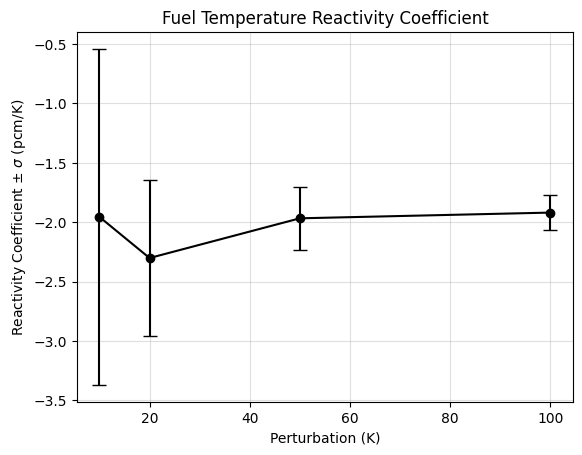

In [26]:
plt.errorbar(hh, [c.n for c in cc_fuel], [c.std_dev for c in cc_fuel], color='k', capsize=5, marker='o')
plt.xlabel("Perturbation (K)") 
plt.ylabel(r"Reactivity Coefficient $\pm$ $\sigma$ (pcm/K)")
plt.title("Fuel Temperature Reactivity Coefficient")
plt.grid(alpha=.4)

A representative value could be -2 pcm/K

## PERTURBATION D  -  ( moderator temperature)

In [27]:
def perturb_mod_T(h):
    fuel_enrichment = 3.0
    pitch = 1.25 # cm
    z_max = 1.0

    fuel_OR = 0.39218 # cm
    clad_OR = 0.45720 # cm

    fuel_density = 10.31341 # g/cm3
    clad_density = 6.55 # g/cm3

    fuel_temperature = 900 #K
    clad_temperature = 600 #K
    mod_temperature = 600 + h #K


    ############### DEFINE MATERIALS

    fuel = openmc.Material(name='fuel')
    fuel.add_element('U', 1, enrichment=fuel_enrichment)
    fuel.add_element('O', 2)
    fuel.set_density('g/cc', fuel_density)
    fuel.temperature = fuel_temperature

    clad = openmc.Material(name='clad')
    clad.add_element('Zr', 100.0, 'wo')
    clad.set_density('g/cm3', clad_density)
    clad.temperature = clad_temperature

    mod = openmc.model.borated_water(boron_ppm=0, temperature=mod_temperature, pressure=15, temp_unit='K', 
                                     press_unit='MPa')


    materials = openmc.Materials([fuel, clad, mod])
    materials.export_to_xml()



    ############### DEFINE GEOMETRY

    cyl_fo = openmc.ZCylinder(r=fuel_OR)
    cyl_co = openmc.ZCylinder(r=clad_OR)
    box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
    z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
    z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

    fuel_cell = openmc.Cell(name='fuel', fill=fuel)
    fuel_cell.region = -cyl_fo & +z0 & -z1
    clad_cell = openmc.Cell(name='clad', fill=clad)
    clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
    mod_cell = openmc.Cell(name='moderator', fill=mod)
    mod_cell.region = +cyl_co & box & +z0 & -z1

    pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
    geometry = openmc.Geometry(pin_univ)
    geometry.export_to_xml()


    ############### DEFINE SETTINGS
    settings = openmc.Settings()
    settings.inactive = 50
    settings.batches = 200
    settings.particles = nps
    settings.temperature={'method': 'interpolation','range':(300,1200)}

    lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
    upper_right = np.array([pitch/2, pitch/2, z_max/2])

    box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
    src = openmc.Source(space=box)
    settings.source = src

    settings.export_to_xml()


    ############### RUN
    openmc.lib.init()
    openmc.lib.run()
    k_c = openmc.lib.keff()
    k_c = ufloat(k_c[0],k_c[1])
    openmc.lib.finalize()
    
    return k_c

In [32]:
# COMPUTE REACTIVITY COEFFICIENT

hh = [20, 10, 5, 2]

cc_mod = [central_difference(h, perturb_mod_T) for h in hh]

print(cc_mod)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O18
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULAT

      181/1    1.27428    1.28742 +/- 0.00059
      182/1    1.28415    1.28740 +/- 0.00059
      183/1    1.29342    1.28744 +/- 0.00059
      184/1    1.28953    1.28746 +/- 0.00058
      185/1    1.28076    1.28741 +/- 0.00058
      186/1    1.30441    1.28753 +/- 0.00059
      187/1    1.29001    1.28755 +/- 0.00059
      188/1    1.28687    1.28755 +/- 0.00058
      189/1    1.29051    1.28757 +/- 0.00058
      190/1    1.28730    1.28757 +/- 0.00057
      191/1    1.28968    1.28758 +/- 0.00057
      192/1    1.27732    1.28751 +/- 0.00057
      193/1    1.28848    1.28751 +/- 0.00057
      194/1    1.29739    1.28758 +/- 0.00057
      195/1    1.28783    1.28758 +/- 0.00056
      196/1    1.28860    1.28759 +/- 0.00056
      197/1    1.29874    1.28767 +/- 0.00056
      198/1    1.30040    1.28775 +/- 0.00056
      199/1    1.30557    1.28787 +/- 0.00057
      200/1    1.28513    1.28785 +/- 0.00057
 Creating state point statepoint.200.h5...

 =======================>     TIMING

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31826    1.32488 +/- 0.00063
      180/1    1.32467    1.32488 +/- 0.00063
      181/1    1.31270    1.32479 +/- 0.00063
      182/1    1.32409    1.32478 +/- 0.00062
      183/1    1.33015    1.32482 +/- 0.00062
      184/1    1.32375    1.32482 +/- 0.00062
      185/1    1.33097    1.32486 +/- 0.00061
      186/1    1.34178    1.32499 +/- 0.00062
      187/1    1.32803    1.32501 +/- 0.00062
      188/1    1.33315    1.32507 +/- 0.00062
      189/1    1.31856    1.32502 +/- 0.00061
      190/1    1.33215    1.32507 +/- 0.00061
      191/1    1.33566    1.32515 +/- 0.00061
      192/1    1.33126    1.32519 +/- 0.00061
      193/1    1.31309    1.32511 +/- 0.00061
      194/1    1.32680    1.32512 +/- 0.00061
      195/1    1.33007    1.32515 +/- 0.00060
      196/1    1.33654    1.32523 +/- 0.00060
      197/1    1.32649    1.32524 +/- 0.00060
      198/1    1.33641    1.32531 +/- 0.00060
      199/1    1.33902    1.32541 +/- 0.00060
      200/1    1.32231    1.32538 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.29975    1.30131 +/- 0.00067
      180/1    1.31157    1.30139 +/- 0.00067
      181/1    1.30298    1.30140 +/- 0.00066
      182/1    1.30606    1.30144 +/- 0.00066
      183/1    1.29905    1.30142 +/- 0.00065
      184/1    1.30694    1.30146 +/- 0.00065
      185/1    1.29295    1.30140 +/- 0.00065
      186/1    1.30623    1.30143 +/- 0.00064
      187/1    1.29377    1.30138 +/- 0.00064
      188/1    1.31054    1.30144 +/- 0.00064
      189/1    1.29583    1.30140 +/- 0.00064
      190/1    1.29171    1.30133 +/- 0.00064
      191/1    1.31195    1.30141 +/- 0.00064
      192/1    1.31594    1.30151 +/- 0.00064
      193/1    1.30259    1.30152 +/- 0.00063
      194/1    1.29841    1.30150 +/- 0.00063
      195/1    1.31520    1.30159 +/- 0.00063
      196/1    1.30262    1.30160 +/- 0.00063
      197/1    1.31170    1.30167 +/- 0.00063
      198/1    1.30667    1.30170 +/- 0.00063
      199/1    1.31210    1.30177 +/- 0.00062
      200/1    1.30267    1.30178 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.32358    1.31836 +/- 0.00061
      180/1    1.31358    1.31833 +/- 0.00061
      181/1    1.31798    1.31832 +/- 0.00060
      182/1    1.31449    1.31829 +/- 0.00060
      183/1    1.32861    1.31837 +/- 0.00060
      184/1    1.32833    1.31845 +/- 0.00060
      185/1    1.32228    1.31847 +/- 0.00060
      186/1    1.31655    1.31846 +/- 0.00059
      187/1    1.32285    1.31849 +/- 0.00059
      188/1    1.30764    1.31841 +/- 0.00059
      189/1    1.31573    1.31839 +/- 0.00059
      190/1    1.33093    1.31848 +/- 0.00059
      191/1    1.32311    1.31852 +/- 0.00058
      192/1    1.31662    1.31850 +/- 0.00058
      193/1    1.32941    1.31858 +/- 0.00058
      194/1    1.30488    1.31848 +/- 0.00059
      195/1    1.31395    1.31845 +/- 0.00058
      196/1    1.31786    1.31845 +/- 0.00058
      197/1    1.30897    1.31838 +/- 0.00058
      198/1    1.31862    1.31839 +/- 0.00057
      199/1    1.32467    1.31843 +/- 0.00057
      200/1    1.31403    1.31840 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.29440    1.30630 +/- 0.00069
      180/1    1.30528    1.30629 +/- 0.00069
      181/1    1.31735    1.30637 +/- 0.00069
      182/1    1.31066    1.30640 +/- 0.00068
      183/1    1.32042    1.30651 +/- 0.00068
      184/1    1.30557    1.30650 +/- 0.00068
      185/1    1.30646    1.30650 +/- 0.00067
      186/1    1.28854    1.30637 +/- 0.00068
      187/1    1.29398    1.30628 +/- 0.00068
      188/1    1.29693    1.30621 +/- 0.00068
      189/1    1.31254    1.30626 +/- 0.00068
      190/1    1.30531    1.30625 +/- 0.00067
      191/1    1.31907    1.30634 +/- 0.00067
      192/1    1.28877    1.30622 +/- 0.00068
      193/1    1.30089    1.30618 +/- 0.00068
      194/1    1.29811    1.30613 +/- 0.00067
      195/1    1.30802    1.30614 +/- 0.00067
      196/1    1.31052    1.30617 +/- 0.00067
      197/1    1.30904    1.30619 +/- 0.00066
      198/1    1.31037    1.30622 +/- 0.00066
      199/1    1.30268    1.30619 +/- 0.00065
      200/1    1.31109    1.30623 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31765    1.31550 +/- 0.00072
      180/1    1.32103    1.31555 +/- 0.00072
      181/1    1.30853    1.31549 +/- 0.00071
      182/1    1.32325    1.31555 +/- 0.00071
      183/1    1.30858    1.31550 +/- 0.00071
      184/1    1.32501    1.31557 +/- 0.00071
      185/1    1.31678    1.31558 +/- 0.00070
      186/1    1.33035    1.31569 +/- 0.00070
      187/1    1.31409    1.31568 +/- 0.00070
      188/1    1.30934    1.31563 +/- 0.00070
      189/1    1.31015    1.31559 +/- 0.00069
      190/1    1.31110    1.31556 +/- 0.00069
      191/1    1.31944    1.31559 +/- 0.00068
      192/1    1.32238    1.31563 +/- 0.00068
      193/1    1.31331    1.31562 +/- 0.00067
      194/1    1.31379    1.31560 +/- 0.00067
      195/1    1.30382    1.31552 +/- 0.00067
      196/1    1.32458    1.31559 +/- 0.00067
      197/1    1.32147    1.31563 +/- 0.00067
      198/1    1.31184    1.31560 +/- 0.00066
      199/1    1.32282    1.31565 +/- 0.00066
      200/1    1.31626    1.31565 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31011    1.31027 +/- 0.00069
      180/1    1.31322    1.31029 +/- 0.00068
      181/1    1.31120    1.31030 +/- 0.00068
      182/1    1.29785    1.31020 +/- 0.00068
      183/1    1.32088    1.31028 +/- 0.00068
      184/1    1.30837    1.31027 +/- 0.00067
      185/1    1.29785    1.31018 +/- 0.00067
      186/1    1.31134    1.31018 +/- 0.00067
      187/1    1.31629    1.31023 +/- 0.00067
      188/1    1.30906    1.31022 +/- 0.00066
      189/1    1.31433    1.31025 +/- 0.00066
      190/1    1.29281    1.31013 +/- 0.00066
      191/1    1.31406    1.31015 +/- 0.00066
      192/1    1.30513    1.31012 +/- 0.00066
      193/1    1.30174    1.31006 +/- 0.00065
      194/1    1.31378    1.31009 +/- 0.00065
      195/1    1.31044    1.31009 +/- 0.00065
      196/1    1.30182    1.31003 +/- 0.00064
      197/1    1.32068    1.31010 +/- 0.00064
      198/1    1.30669    1.31008 +/- 0.00064
      199/1    1.30177    1.31002 +/- 0.00064
      200/1    1.30389    1.30998 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31546    1.31140 +/- 0.00063
      180/1    1.31144    1.31140 +/- 0.00062
      181/1    1.31016    1.31139 +/- 0.00062
      182/1    1.29850    1.31129 +/- 0.00062
      183/1    1.31337    1.31131 +/- 0.00062
      184/1    1.31518    1.31134 +/- 0.00061
      185/1    1.33187    1.31149 +/- 0.00063
      186/1    1.31061    1.31148 +/- 0.00062
      187/1    1.30391    1.31143 +/- 0.00062
      188/1    1.31770    1.31147 +/- 0.00062
      189/1    1.31533    1.31150 +/- 0.00061
      190/1    1.29923    1.31141 +/- 0.00061
      191/1    1.30741    1.31138 +/- 0.00061
      192/1    1.32774    1.31150 +/- 0.00062
      193/1    1.30889    1.31148 +/- 0.00061
      194/1    1.31718    1.31152 +/- 0.00061
      195/1    1.31045    1.31151 +/- 0.00061
      196/1    1.32164    1.31158 +/- 0.00061
      197/1    1.30465    1.31154 +/- 0.00060
      198/1    1.30998    1.31153 +/- 0.00060
      199/1    1.30926    1.31151 +/- 0.00060
      200/1    1.31555    1.31154 

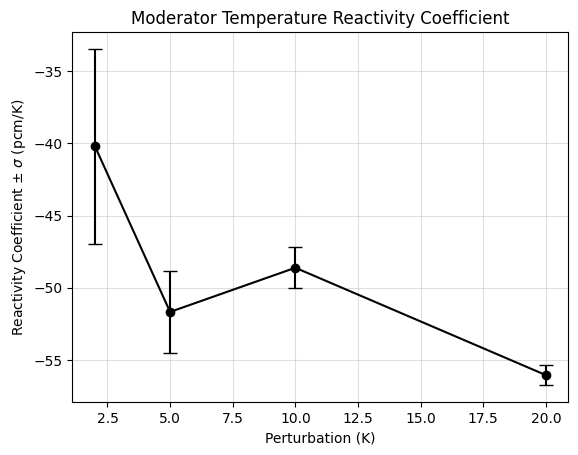

In [33]:
plt.errorbar(hh, [c.n for c in cc_mod], [c.std_dev for c in cc_mod], color='k', capsize=5, marker='o')
plt.xlabel("Perturbation (K)") 
plt.ylabel(r"Reactivity Coefficient $\pm$ $\sigma$ (pcm/K)")
plt.title("Moderator Temperature Reactivity Coefficient")
plt.grid(alpha=.4)

A representative value could be around -50 pcm/K 

##  E  -  find critical boron level

In [12]:
def pincell_model(b_ppm):
    fuel_enrichment = 3.0
    pitch = 1.25 # cm
    z_max = 1.0

    fuel_OR = 0.39218 # cm
    clad_OR = 0.45720 # cm

    fuel_density = 10.31341 # g/cm3
    clad_density = 6.55 # g/cm3

    fuel_temperature = 900 #K
    clad_temperature = 600 #K
    mod_temperature = 600 #K


    ############### DEFINE MATERIALS

    fuel = openmc.Material(name='fuel')
    fuel.add_element('U', 1, enrichment=fuel_enrichment)
    fuel.add_element('O', 2)
    fuel.set_density('g/cc', fuel_density)
    fuel.temperature = fuel_temperature

    clad = openmc.Material(name='clad')
    clad.add_element('Zr', 100.0, 'wo')
    clad.set_density('g/cm3', clad_density)
    clad.temperature = clad_temperature

    mod = openmc.model.borated_water(boron_ppm=b_ppm, temperature=mod_temperature, pressure=15, temp_unit='K', 
                                     press_unit='MPa')


    materials = openmc.Materials([fuel, clad, mod])



    ############### DEFINE GEOMETRY

    cyl_fo = openmc.ZCylinder(r=fuel_OR)
    cyl_co = openmc.ZCylinder(r=clad_OR)
    box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
    z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
    z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

    fuel_cell = openmc.Cell(name='fuel', fill=fuel)
    fuel_cell.region = -cyl_fo & +z0 & -z1
    clad_cell = openmc.Cell(name='clad', fill=clad)
    clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
    mod_cell = openmc.Cell(name='moderator', fill=mod)
    mod_cell.region = +cyl_co & box & +z0 & -z1

    pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
    geometry = openmc.Geometry(pin_univ)

    ############### DEFINE SETTINGS
    settings = openmc.Settings()
    settings.inactive = 50
    settings.batches = 200
    settings.particles = nps 
    settings.temperature={'method': 'interpolation','range':(300,1200)}

    lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
    upper_right = np.array([pitch/2, pitch/2, z_max/2])

    box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
    src = openmc.Source(space=box)
    settings.source = src
    settings.output = {'tallies': False}


    model = openmc.model.Model(geometry, materials, settings)
    return model

In [13]:
# Perform the search
crit_ppm, guesses, keffs = openmc.search_for_keff(pincell_model, bracket=[0., 10000.],
                                                  tol=1e-3, print_iterations=True, 
                                                  run_args={'output': False})

print('Critical Boron Concentration: {:4.0f} ppm'.format(crit_ppm))

Iteration: 1; Guess of 0.00e+00 produced a keff of 1.31095 +/- 0.00033
Iteration: 2; Guess of 1.00e+04 produced a keff of 0.69779 +/- 0.00025
Iteration: 3; Guess of 5.00e+03 produced a keff of 0.89524 +/- 0.00028
Iteration: 4; Guess of 2.50e+03 produced a keff of 1.05828 +/- 0.00034
Iteration: 5; Guess of 3.75e+03 produced a keff of 0.96812 +/- 0.00030
Iteration: 6; Guess of 3.12e+03 produced a keff of 1.01096 +/- 0.00033
Iteration: 7; Guess of 3.44e+03 produced a keff of 0.98928 +/- 0.00032
Iteration: 8; Guess of 3.28e+03 produced a keff of 0.99937 +/- 0.00030
Iteration: 9; Guess of 3.20e+03 produced a keff of 1.00525 +/- 0.00031
Iteration: 10; Guess of 3.24e+03 produced a keff of 1.00255 +/- 0.00031
Iteration: 11; Guess of 3.26e+03 produced a keff of 1.00089 +/- 0.00030
Iteration: 12; Guess of 3.27e+03 produced a keff of 0.99997 +/- 0.00031
Iteration: 13; Guess of 3.27e+03 produced a keff of 1.00044 +/- 0.00031
Iteration: 14; Guess of 3.27e+03 produced a keff of 1.00039 +/- 0.00029
C

## PERTURBATION F  -  (boron worth)

In [34]:
def perturb_boron(h):
    fuel_enrichment = 3.0
    pitch = 1.25 # cm
    z_max = 1.0

    fuel_OR = 0.39218 # cm
    clad_OR = 0.45720 # cm

    fuel_density = 10.31341 # g/cm3
    clad_density = 6.55 # g/cm3

    fuel_temperature = 900 #K
    clad_temperature = 600 #K
    mod_temperature = 600 #K


    ############### DEFINE MATERIALS

    fuel = openmc.Material(name='fuel')
    fuel.add_element('U', 1, enrichment=fuel_enrichment)
    fuel.add_element('O', 2)
    fuel.set_density('g/cc', fuel_density)
    fuel.temperature = fuel_temperature

    clad = openmc.Material(name='clad')
    clad.add_element('Zr', 100.0, 'wo')
    clad.set_density('g/cm3', clad_density)
    clad.temperature = clad_temperature

    mod = openmc.model.borated_water(boron_ppm=h, temperature=mod_temperature, pressure=15, temp_unit='K', 
                                     press_unit='MPa')


    materials = openmc.Materials([fuel, clad, mod])
    materials.export_to_xml()



    ############### DEFINE GEOMETRY

    cyl_fo = openmc.ZCylinder(r=fuel_OR)
    cyl_co = openmc.ZCylinder(r=clad_OR)
    box = openmc.model.rectangular_prism(pitch, pitch, boundary_type='reflective')
    z0 = openmc.ZPlane(z0=-z_max, boundary_type='reflective')
    z1 = openmc.ZPlane(z0=z_max, boundary_type='reflective')

    fuel_cell = openmc.Cell(name='fuel', fill=fuel)
    fuel_cell.region = -cyl_fo & +z0 & -z1
    clad_cell = openmc.Cell(name='clad', fill=clad)
    clad_cell.region = +cyl_fo & -cyl_co & +z0 & -z1
    mod_cell = openmc.Cell(name='moderator', fill=mod)
    mod_cell.region = +cyl_co & box & +z0 & -z1

    pin_univ = openmc.Universe(cells=(fuel_cell, clad_cell, mod_cell))
    geometry = openmc.Geometry(pin_univ)
    geometry.export_to_xml()


    ############### DEFINE SETTINGS
    settings = openmc.Settings()
    settings.inactive = 50
    settings.batches = 200
    settings.particles = nps
    settings.temperature={'method': 'interpolation','range':(300,1200)}

    lower_left = np.array([-pitch/2, -pitch/2, -z_max/2])
    upper_right = np.array([pitch/2, pitch/2, z_max/2])

    box = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
    src = openmc.Source(space=box)
    settings.source = src

    settings.export_to_xml()


    ############### RUN
    openmc.lib.init()
    openmc.lib.run()
    k_c = openmc.lib.keff()
    k_c = ufloat(k_c[0],k_c[1])
    openmc.lib.finalize()
    
    return k_c

In [35]:
def forward_difference(h, function):
    k_forw = function(h)
    
    coeff = (1/k_ref - 1/k_forw)*1e5/h
    return coeff

In [36]:
# COMPUTE BORON WORTH 

hh = [200, 100, 50, 25]

cc_boron = [forward_difference(h, perturb_boron) for h in hh]

print(cc_boron)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O18
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULAT

      181/1    1.28262    1.28544 +/- 0.00060
      182/1    1.29334    1.28550 +/- 0.00060
      183/1    1.27880    1.28545 +/- 0.00060
      184/1    1.28194    1.28543 +/- 0.00059
      185/1    1.27127    1.28532 +/- 0.00060
      186/1    1.29038    1.28536 +/- 0.00060
      187/1    1.28763    1.28537 +/- 0.00059
      188/1    1.29252    1.28543 +/- 0.00059
      189/1    1.29323    1.28548 +/- 0.00059
      190/1    1.28625    1.28549 +/- 0.00058
      191/1    1.28719    1.28550 +/- 0.00058
      192/1    1.29092    1.28554 +/- 0.00058
      193/1    1.28872    1.28556 +/- 0.00057
      194/1    1.29530    1.28563 +/- 0.00057
      195/1    1.28266    1.28561 +/- 0.00057
      196/1    1.27400    1.28553 +/- 0.00057
      197/1    1.27100    1.28543 +/- 0.00058
      198/1    1.28512    1.28543 +/- 0.00057
      199/1    1.28411    1.28542 +/- 0.00057
      200/1    1.28117    1.28539 +/- 0.00057
 Creating state point statepoint.200.h5...

 =======================>     TIMING

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.29996    1.29903 +/- 0.00066
      180/1    1.30335    1.29907 +/- 0.00065
      181/1    1.29962    1.29907 +/- 0.00065
      182/1    1.29308    1.29903 +/- 0.00065
      183/1    1.31212    1.29912 +/- 0.00065
      184/1    1.29943    1.29913 +/- 0.00064
      185/1    1.30674    1.29918 +/- 0.00064
      186/1    1.30443    1.29922 +/- 0.00064
      187/1    1.30925    1.29929 +/- 0.00064
      188/1    1.30675    1.29935 +/- 0.00063
      189/1    1.29854    1.29934 +/- 0.00063
      190/1    1.30249    1.29937 +/- 0.00063
      191/1    1.30596    1.29941 +/- 0.00062
      192/1    1.30109    1.29942 +/- 0.00062
      193/1    1.30006    1.29943 +/- 0.00061
      194/1    1.31053    1.29951 +/- 0.00062
      195/1    1.30232    1.29952 +/- 0.00061
      196/1    1.29280    1.29948 +/- 0.00061
      197/1    1.29439    1.29944 +/- 0.00061
      198/1    1.29787    1.29943 +/- 0.00060
      199/1    1.29901    1.29943 +/- 0.00060
      200/1    1.29430    1.29940 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.30968    1.30435 +/- 0.00064
      180/1    1.30285    1.30434 +/- 0.00063
      181/1    1.30317    1.30433 +/- 0.00063
      182/1    1.30553    1.30434 +/- 0.00062
      183/1    1.29597    1.30428 +/- 0.00062
      184/1    1.29796    1.30423 +/- 0.00062
      185/1    1.30231    1.30421 +/- 0.00061
      186/1    1.29084    1.30412 +/- 0.00062
      187/1    1.31185    1.30417 +/- 0.00061
      188/1    1.30675    1.30419 +/- 0.00061
      189/1    1.29517    1.30413 +/- 0.00061
      190/1    1.30644    1.30414 +/- 0.00060
      191/1    1.31164    1.30420 +/- 0.00060
      192/1    1.30268    1.30418 +/- 0.00060
      193/1    1.32017    1.30430 +/- 0.00060
      194/1    1.30626    1.30431 +/- 0.00060
      195/1    1.30479    1.30431 +/- 0.00060
      196/1    1.31076    1.30436 +/- 0.00059
      197/1    1.29831    1.30432 +/- 0.00059
      198/1    1.30230    1.30430 +/- 0.00059
      199/1    1.30424    1.30430 +/- 0.00058
      200/1    1.29570    1.30425 

 Reading Zr94 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr94.h5
 Reading Zr92 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr92.h5
 Reading Zr91 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr91.h5
 Reading Zr90 from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/Zr90.h5
 Reading H2 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H2.h5
 Reading H1 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/H1.h5
 Reading B10 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B10.h5
 Reading B11 from /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/B11.h5
 Reading c_H_in_H2O from
 /home/lorenzomazzocco/Desktop/nuclear_data/endfb80_hdf5/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for O1

      179/1    1.31052    1.30893 +/- 0.00062
      180/1    1.30731    1.30891 +/- 0.00062
      181/1    1.30175    1.30886 +/- 0.00062
      182/1    1.29597    1.30876 +/- 0.00062
      183/1    1.31093    1.30878 +/- 0.00062
      184/1    1.32829    1.30892 +/- 0.00063
      185/1    1.30505    1.30889 +/- 0.00062
      186/1    1.31003    1.30890 +/- 0.00062
      187/1    1.31415    1.30894 +/- 0.00062
      188/1    1.30319    1.30890 +/- 0.00061
      189/1    1.30218    1.30885 +/- 0.00061
      190/1    1.31096    1.30887 +/- 0.00061
      191/1    1.31207    1.30889 +/- 0.00060
      192/1    1.30515    1.30886 +/- 0.00060
      193/1    1.31120    1.30888 +/- 0.00060
      194/1    1.30844    1.30888 +/- 0.00059
      195/1    1.30699    1.30886 +/- 0.00059
      196/1    1.31123    1.30888 +/- 0.00058
      197/1    1.32048    1.30896 +/- 0.00058
      198/1    1.32152    1.30904 +/- 0.00059
      199/1    1.31545    1.30909 +/- 0.00058
      200/1    1.31285    1.30911 

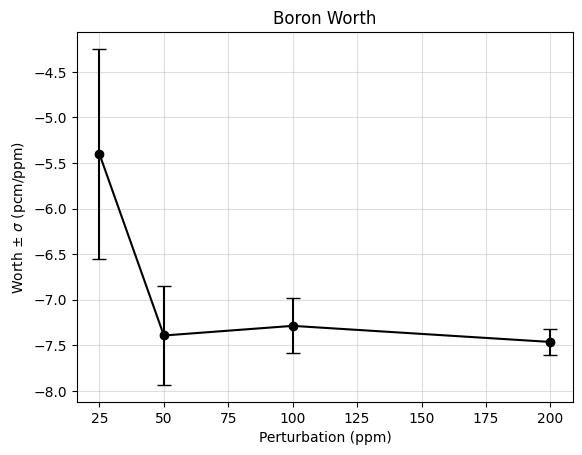

In [38]:
plt.errorbar(hh, [c.n for c in cc_boron], [c.std_dev for c in cc_boron], color='k', capsize=5, marker='o')
plt.xlabel("Perturbation (ppm)") 
plt.ylabel(r"Worth $\pm$ $\sigma$ (pcm/ppm)")
plt.title("Boron Worth")
plt.grid(alpha=.4)

A representative value could be -7.5 pcm/ppm